In [1]:
from dataset import get_loader
from utils import plot_batch

In [2]:
from pathlib import Path

In [3]:
from config import Config

In [4]:
celeb_path = Path('./data/CelebA')
train_path = celeb_path / 'train'
test_path = celeb_path / 'test'
val_path = celeb_path / 'validation'

In [5]:
model_id = 'vit_b32'

In [6]:
config = Config(
    model_id=model_id,
    img_size=224,
    train_path=train_path,
    test_path=test_path,
    val_path=val_path,
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

In [7]:
batch_size = 2
image_limit = 2

learning_rate = 1e-8
num_epochs = 10

debug = True
debug_step = 5

In [8]:
train_loader = get_loader(
    data_path=train_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=True
)

In [9]:
val_loader = get_loader(
    data_path=val_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=True
)

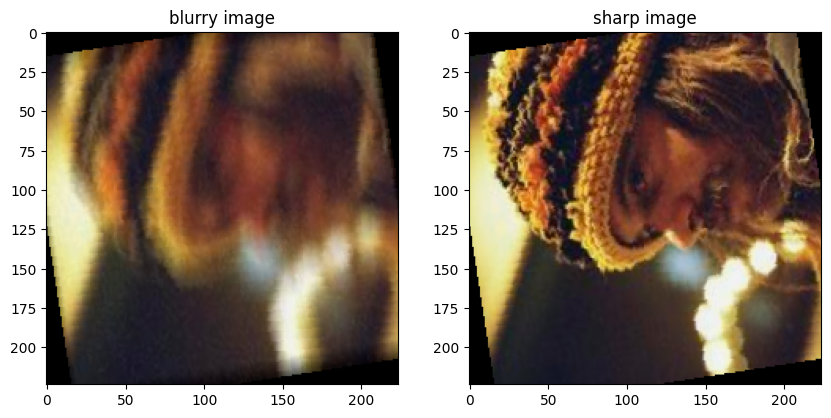

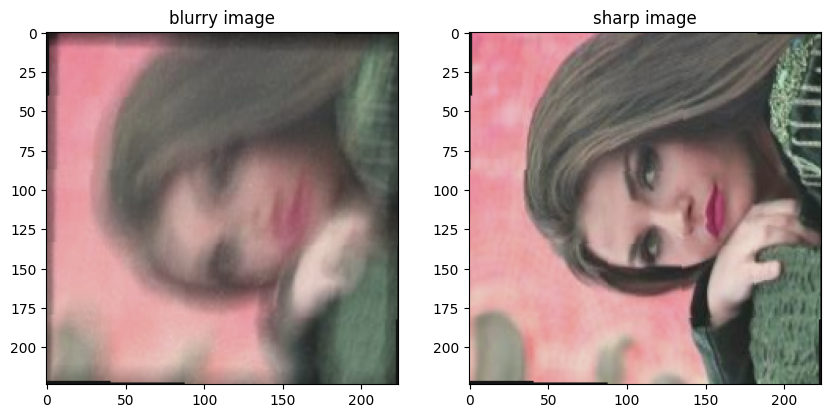

In [10]:
plot_batch(train_loader, config=config, batch_index=0)

In [11]:
from cnn import get_cnn
from vit import get_vit

In [12]:
model = get_vit(config=config)

In [13]:
from loss import SUPPORTED_LOSS, get_loss

In [14]:
print(f'Supported losses: {list(SUPPORTED_LOSS.keys())}')

Supported losses: ['L1', 'MSE', 'PSNR']


In [15]:
criterion = get_loss('mse')

In [16]:
from trainer import Trainer

In [17]:
from optimizer import get_optimizer, SUPPORTED_OPTIMIZERS

In [18]:
print(SUPPORTED_OPTIMIZERS)

{'ADAM': <class 'torch.optim.adam.Adam'>, 'SGD': <class 'torch.optim.sgd.SGD'>}


In [19]:
optimizer = get_optimizer(
    optimizer_id='SGD',
    model=model,
    learning_rate=learning_rate
)

In [20]:
trainer = Trainer(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    config=config,
    debug=debug,
    debug_step=debug_step
)

In [21]:
Trainer.supported_models()

['resnet50',
 'resnet101',
 'resnet152',
 'inception_v3',
 'vit_b32',
 'vit_l32',
 'vit_h14']

Starting Epoch 1 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.028497458..0.9003134].


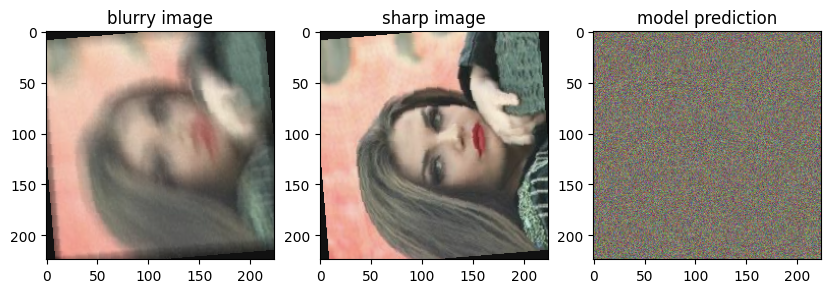

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04954499..0.8588443].


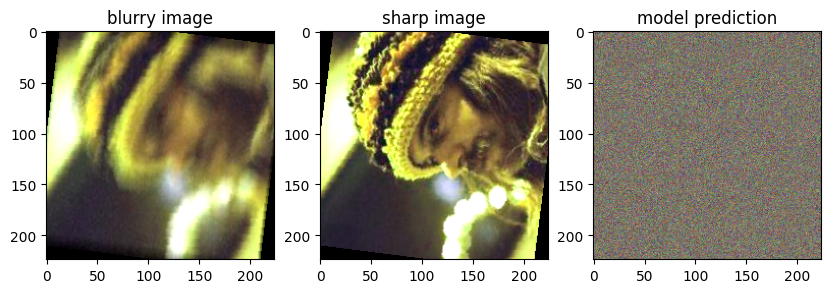

100%|██████████| 1/1 [00:00<00:00, 35.52batch/s]


Epoch: 1, Train loss: 3.3325, Validation loss: 3.2915
Starting Epoch 2 of 10.


100%|██████████| 1/1 [00:00<00:00, 36.48batch/s]


Epoch: 2, Train loss: 3.6697, Validation loss: 3.3918
Starting Epoch 3 of 10.


100%|██████████| 1/1 [00:00<00:00, 35.89batch/s]


Epoch: 3, Train loss: 2.8486, Validation loss: 2.9905
Starting Epoch 4 of 10.


100%|██████████| 1/1 [00:00<00:00, 36.17batch/s]


Epoch: 4, Train loss: 3.1964, Validation loss: 3.6422
Starting Epoch 5 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0152345..0.94472265].


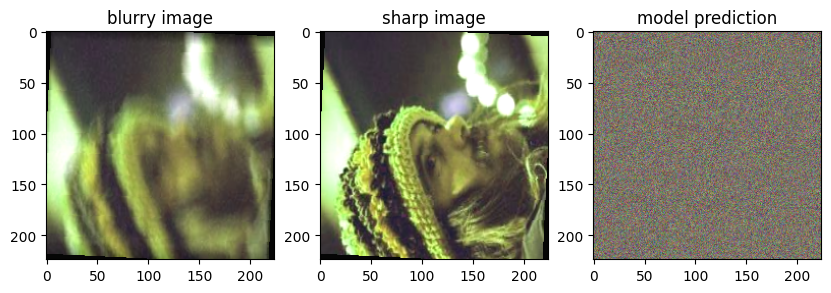

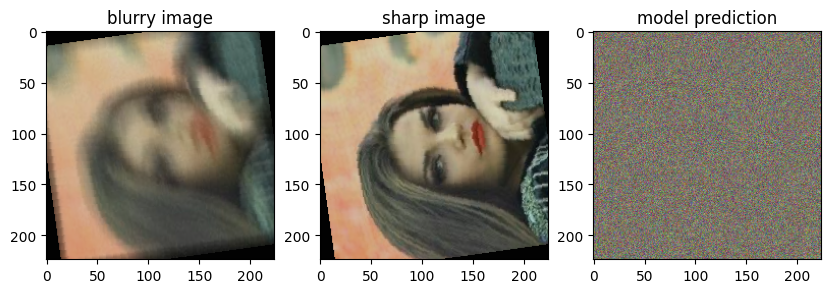

100%|██████████| 1/1 [00:00<00:00, 32.14batch/s]


Epoch: 5, Train loss: 2.6420, Validation loss: 3.2465
Starting Epoch 6 of 10.


100%|██████████| 1/1 [00:00<00:00, 38.23batch/s]


Epoch: 6, Train loss: 3.3728, Validation loss: 4.1417
Starting Epoch 7 of 10.


100%|██████████| 1/1 [00:00<00:00, 33.83batch/s]


Epoch: 7, Train loss: 3.1699, Validation loss: 3.5868
Starting Epoch 8 of 10.


100%|██████████| 1/1 [00:00<00:00, 33.09batch/s]


Epoch: 8, Train loss: 2.4451, Validation loss: 4.2385
Starting Epoch 9 of 10.


100%|██████████| 1/1 [00:00<00:00, 34.19batch/s]


Epoch: 9, Train loss: 3.2921, Validation loss: 3.9631
Starting Epoch 10 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

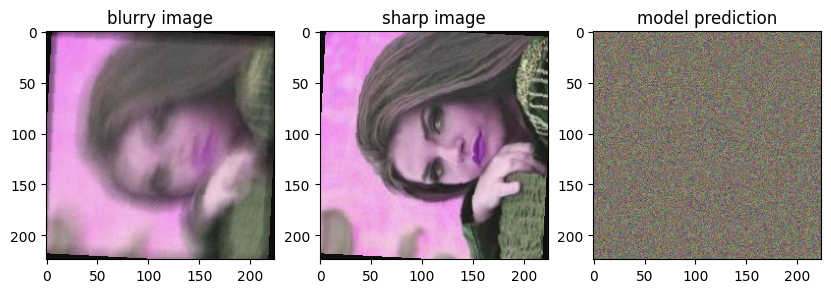

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.019120902..0.9218174].


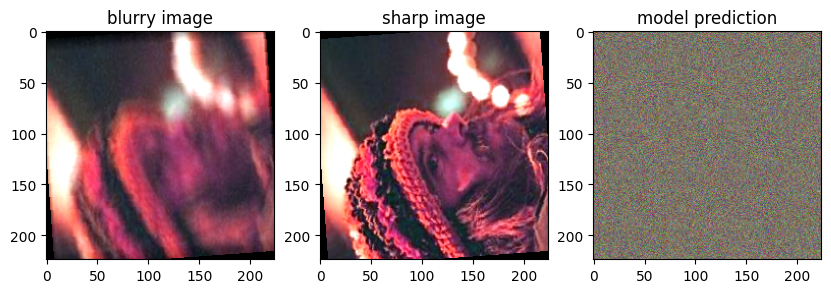

100%|██████████| 1/1 [00:00<00:00, 33.48batch/s]


Epoch: 10, Train loss: 3.3775, Validation loss: 3.7217


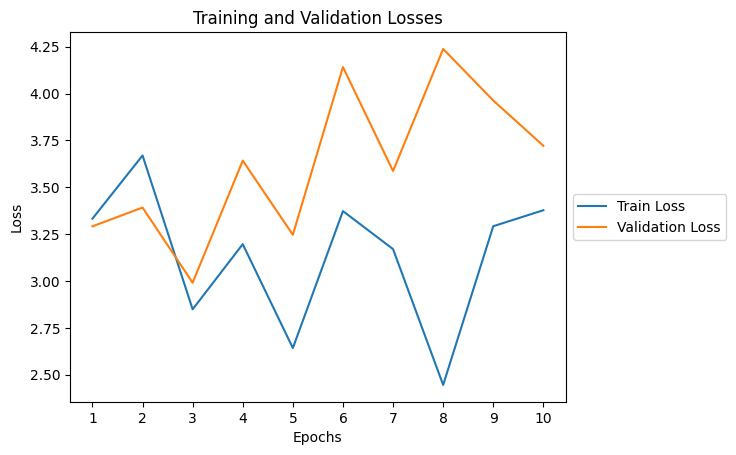

In [22]:
trainer.train(
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=num_epochs
)